<a href="https://colab.research.google.com/github/Perception12/fashion_mnist_prediction/blob/main/fashion_mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist

In [39]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [9]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [10]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [11]:
classes = np.unique(y_train)
nClasses = len(classes)

print("Total number of outputs: {}".format(nClasses))
print("Output classes: {}".format(classes))

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

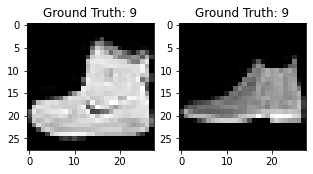

In [13]:
plt.figure(figsize=(5,5))

#Display first image in training data
plt.subplot(1,2,1)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(y_train[0]))

#Display the first image of test data
plt.subplot(1,2,2)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(y_test[0]))

In [40]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [42]:
# one-hot encoding of labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [23]:
print("Original label: {}".format(y_train[0]))
print("Encoded label: {}".format(y_train_one_hot[0]))

Original label: 9
Encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [25]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, label_train, label_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=101)

In [44]:
X_train.shape, X_val.shape, label_train.shape, label_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [30]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers.advanced_activations import LeakyReLU

In [57]:
batch_size = 64
epochs = 20
num_classes = 10

In [58]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28, 28, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [60]:
fashion_train = model.fit(X_train, label_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, label_val))

Epoch 1/20
750/750 [==============================] - 95s 126ms/step - loss: 0.6096 - accuracy: 0.7714 - val_loss: 0.3707 - val_accuracy: 0.8614
Epoch 2/20
750/750 [==============================] - 95s 127ms/step - loss: 0.3789 - accuracy: 0.8609 - val_loss: 0.3016 - val_accuracy: 0.8879
Epoch 3/20
750/750 [==============================] - 95s 126ms/step - loss: 0.3330 - accuracy: 0.8783 - val_loss: 0.2670 - val_accuracy: 0.9057
Epoch 4/20
750/750 [==============================] - 95s 126ms/step - loss: 0.3038 - accuracy: 0.8874 - val_loss: 0.2460 - val_accuracy: 0.9094
Epoch 5/20
750/750 [==============================] - 95s 126ms/step - loss: 0.2849 - accuracy: 0.8963 - val_loss: 0.2403 - val_accuracy: 0.9096
Epoch 6/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2673 - accuracy: 0.8996 - val_loss: 0.2276 - val_accuracy: 0.9164
Epoch 7/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2579 - accuracy: 0.9039 - val_loss: 0.2217 - val_ac

In [61]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [62]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test Loss:  0.222161203622818
Test Accuracy:  0.9222000241279602


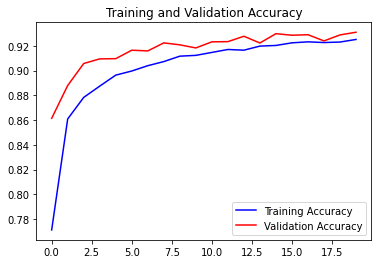

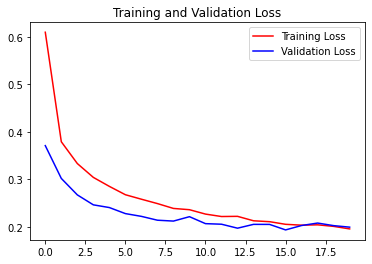

In [63]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()


In [64]:
predicted_classes = model.predict(X_test)

In [65]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [66]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

In [68]:
correct = np.where(predicted_classes == y_test)[0]
print("Found {} correct labels".format(len(correct)))

Found 9188 correct labels


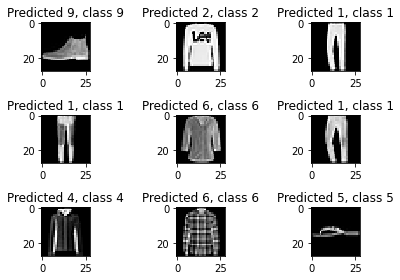

In [69]:
for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

In [71]:
incorrect = np.where(predicted_classes != y_test)[0]
print("Found {} incorrect labels".format(len(incorrect)))

Found 812 incorrect labels


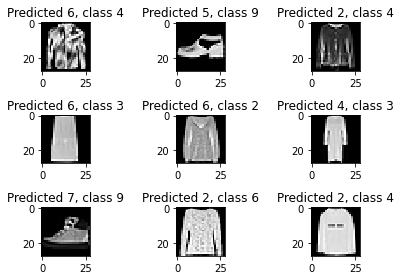

In [72]:
for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()

In [74]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.90      0.85      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.91      0.81      0.86      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.78      0.77      0.77      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

